In [0]:
#transfer learning model using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
#resource: https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import zipfile
import cv2
from google.colab import drive
drive.mount('/content/drive')
print("success")
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
success
/content


In [0]:
with zipfile.ZipFile("./drive/My Drive/new_train_and_test.zip", 'r') as zip_ref:
    zip_ref.extractall("./dataset/")

In [0]:
dim = (224, 224)
train_data_path = "./dataset/train_images"
engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_images = engine_images.flow_from_directory(str(train_data_path), target_size=dim)

test_data_path = "./dataset/test_images"
engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
testing_images = engine_images.flow_from_directory(str(test_data_path), target_size=dim)

Found 25974 images belonging to 120 classes.
Found 2900 images belonging to 120 classes.


In [0]:
mobilenet = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                                                                                     input_shape=(224,224,3))
mobilenet.trainable = False #dont train the pretrained model

Experiment #1
optimizer: Adam, loss function: Categorical Crossentropy, batch size: 32

Epoch 1/10
812/812 [==============================] - 103s 127ms/step - loss: 0.9831 - acc: 0.7350 - val_loss: 0.5612 - val_acc: 0.8241
Epoch 2/10
812/812 [==============================] - 100s 124ms/step - loss: 0.4598 - acc: 0.8567 - val_loss: 0.5149 - val_acc: 0.8369
Epoch 3/10
812/812 [==============================] - 100s 123ms/step - loss: 0.3342 - acc: 0.8971 - val_loss: 0.5130 - val_acc: 0.8269
Epoch 4/10
812/812 [==============================] - 100s 123ms/step - loss: 0.2545 - acc: 0.9232 - val_loss: 0.5203 - val_acc: 0.8324
Epoch 5/10
812/812 [==============================] - 101s 124ms/step - loss: 0.2005 - acc: 0.9407 - val_loss: 0.5218 - val_acc: 0.8359
Epoch 6/10
812/812 [==============================] - 100s 123ms/step - loss: 0.1580 - acc: 0.9564 - val_loss: 0.5208 - val_acc: 0.8397
Epoch 7/10
812/812 [==============================] - 101s 124ms/step - loss: 0.1267 - acc: 0.96

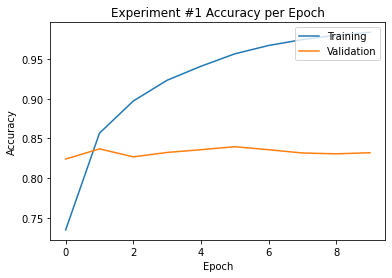

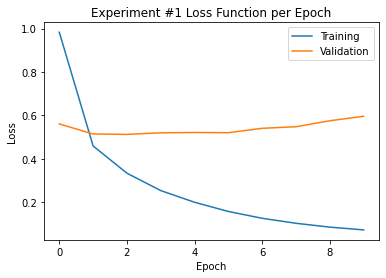

In [0]:
print("Experiment #1\noptimizer: Adam, loss function: Categorical Crossentropy, batch size: 32\n")
model = tf.keras.Sequential([mobilenet, layers.Dense(training_images.num_classes, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
num_batches = np.ceil(training_images.samples/32)
history = model.fit(training_images, epochs=10, steps_per_epoch=num_batches, validation_data=testing_images)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Experiment #1 Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Experiment #1 Loss Function per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Experiment #2
optimizer: Adagrad, loss function: Categorical Crossentropy, batch size: 64, epochs=20

Epoch 1/20
406/406 [==============================] - 59s 145ms/step - loss: 4.5721 - acc: 0.0592 - val_loss: 4.1077 - val_acc: 0.1417
Epoch 2/20
406/406 [==============================] - 55s 136ms/step - loss: 3.8127 - acc: 0.2239 - val_loss: 3.4851 - val_acc: 0.3197
Epoch 3/20
406/406 [==============================] - 55s 136ms/step - loss: 3.2753 - acc: 0.3831 - val_loss: 3.0238 - val_acc: 0.4769
Epoch 4/20
406/406 [==============================] - 55s 136ms/step - loss: 2.8829 - acc: 0.4879 - val_loss: 2.6621 - val_acc: 0.5700
Epoch 5/20
406/406 [==============================] - 55s 135ms/step - loss: 2.5577 - acc: 0.5713 - val_loss: 2.3750 - val_acc: 0.6228
Epoch 6/20
406/406 [==============================] - 55s 137ms/step - loss: 2.3094 - acc: 0.6140 - val_loss: 2.1473 - val_acc: 0.6586
Epoch 7/20
406/406 [==============================] - 55s 136ms/step - loss: 2.1057 - ac

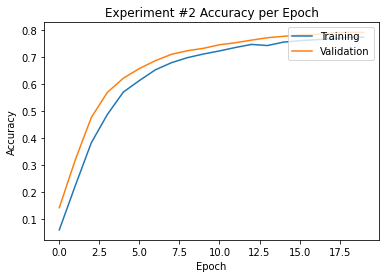

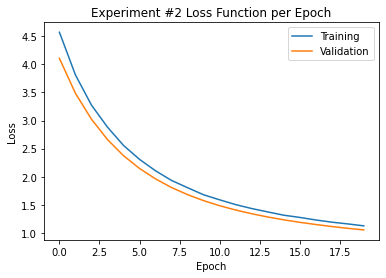

In [0]:
print("Experiment #2\noptimizer: Adagrad, loss function: Categorical Crossentropy, batch size: 64, epochs=20\n")
model = tf.keras.Sequential([mobilenet, layers.Dense(training_images.num_classes, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='categorical_crossentropy', metrics=['accuracy'])
num_batches = np.ceil(training_images.samples/64.0)
history = model.fit(training_images, epochs=20, steps_per_epoch=num_batches, validation_data=testing_images)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Experiment #2 Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Experiment #2 Loss Function per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Experiment #3
optimizer: Adagrad, learning rate=0.01, loss function: Categorical Crossentropy, batch size: 32, epochs=20

Epoch 1/20
812/812 [==============================] - 104s 128ms/step - loss: 1.6169 - acc: 0.6634 - val_loss: 0.7441 - val_acc: 0.8124
Epoch 2/20
812/812 [==============================] - 100s 123ms/step - loss: 0.7105 - acc: 0.8148 - val_loss: 0.5964 - val_acc: 0.8297
Epoch 3/20
812/812 [==============================] - 101s 124ms/step - loss: 0.5927 - acc: 0.8381 - val_loss: 0.5470 - val_acc: 0.8362
Epoch 4/20
812/812 [==============================] - 100s 123ms/step - loss: 0.5306 - acc: 0.8544 - val_loss: 0.5183 - val_acc: 0.8452
Epoch 5/20
812/812 [==============================] - 101s 124ms/step - loss: 0.4898 - acc: 0.8634 - val_loss: 0.5031 - val_acc: 0.8466
Epoch 6/20
812/812 [==============================] - 101s 124ms/step - loss: 0.4591 - acc: 0.8721 - val_loss: 0.4892 - val_acc: 0.8472
Epoch 7/20
812/812 [==============================] - 101s 124

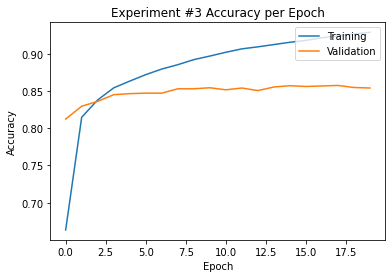

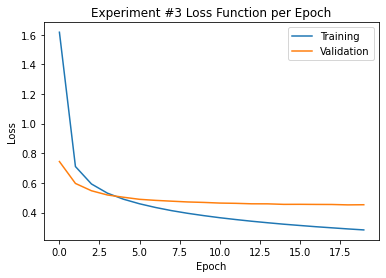

In [0]:
print("Experiment #3\noptimizer: Adagrad, learning rate=0.01, loss function: Categorical Crossentropy, batch size: 32, epochs=20\n")
model = tf.keras.Sequential([mobilenet, layers.Dense(training_images.num_classes, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
num_batches = np.ceil(training_images.samples/32.0)
history = model.fit(training_images, epochs=20, steps_per_epoch=num_batches, validation_data=testing_images)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Experiment #3 Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Experiment #3 Loss Function per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Experiment #4
optimizer: Adam, learning rate=0.005, loss function: Mean Squared Error, batch size: 64

Epoch 1/10
406/406 [==============================] - 58s 144ms/step - loss: 0.0063 - acc: 0.4687 - val_loss: 0.0059 - val_acc: 0.5424
Epoch 2/10
406/406 [==============================] - 55s 134ms/step - loss: 0.0064 - acc: 0.5316 - val_loss: 0.0060 - val_acc: 0.5690
Epoch 3/10
406/406 [==============================] - 55s 135ms/step - loss: 0.0058 - acc: 0.5905 - val_loss: 0.0058 - val_acc: 0.5966
Epoch 4/10
406/406 [==============================] - 55s 135ms/step - loss: 0.0060 - acc: 0.5855 - val_loss: 0.0061 - val_acc: 0.5886
Epoch 5/10
406/406 [==============================] - 54s 134ms/step - loss: 0.0057 - acc: 0.6165 - val_loss: 0.0059 - val_acc: 0.6072
Epoch 6/10
406/406 [==============================] - 55s 135ms/step - loss: 0.0058 - acc: 0.6129 - val_loss: 0.0059 - val_acc: 0.6072
Epoch 7/10
406/406 [==============================] - 55s 135ms/step - loss: 0.0056 - a

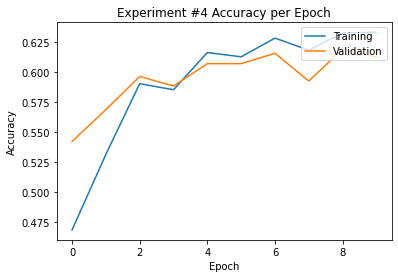

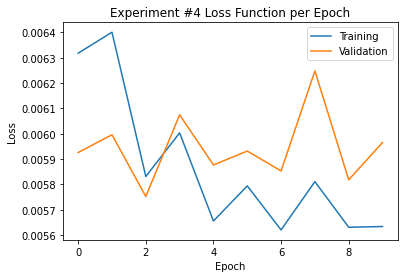

In [0]:
print("Experiment #4\noptimizer: Adam, learning rate=0.005, loss function: Mean Squared Error, batch size: 64\n")
model = tf.keras.Sequential([mobilenet, layers.Dense(training_images.num_classes, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='mean_squared_error', metrics=['accuracy'])
num_batches = np.ceil(training_images.samples/64.0)
history = model.fit(training_images, epochs=10, steps_per_epoch=num_batches, validation_data=testing_images)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Experiment #4 Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Experiment #4 Loss Function per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()